<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

In [2]:
import numpy as np
import pandas as pd

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

### Load Data (5 Marks)

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
project_path = '/content/drive/My Drive/GL dataset/'

In [5]:
project_path = '/content/drive/My Drive/GL dataset/'
data_path = project_path + 'Sarcasm Detection.zip'

In [6]:
from zipfile import ZipFile
with ZipFile(data_path, 'r') as z:
  z.extractall()
print("Data zip extraction done!")

Data zip extraction done!


In [7]:
df=pd.read_json("/content/Sarcasm Detection/Data/Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


### Drop `article_link` from dataset (5 Marks)

In [8]:
df.drop('article_link', axis=1, inplace=True)

In [9]:
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


### Get length of each headline and add a column for that (5 Marks)

In [10]:
df['Headline_Len'] = df['headline'].astype(str).map(len)

In [11]:
df.head()

,headline,is_sarcastic,Headline_Len
0,former versace store clerk sues over secret 'b...,0,78
1,the 'roseanne' revival catches up to our thorn...,0,84
2,mom starting to fear son's web series closest ...,1,79
3,"boehner just wants wife to listen, not come up...",1,84
4,j.k. rowling wishes snape happy birthday in th...,0,64


### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [12]:
max_features = 10000
maxlen = 25
embedding_size = 200

### Apply `tensorflow.keras` Tokenizer and get indices for words (5 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['headline'].values)
X = tokenizer.texts_to_sequences(df['headline'].values)

word_index=tokenizer.word_index

### Pad sequences (5 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=maxlen)

In [15]:
#Defining target variable
Y = df['is_sarcastic']
Y.head()

0    0
1    0
2    1
3    1
4    0
Name: is_sarcastic, dtype: int64

In [16]:
#Checking shape of X
X.shape

(26709, 25)

In [17]:
#Checking shape of Y
Y.shape

(26709,)

### Vocab mapping
- There is no word for 0th index

In [18]:
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'into': 41,
 'report': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 "'": 71,
 'women': 72,
 'make': 73,
 'was': 74,
 'than': 75,
 'white': 76,
 'back': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [19]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

29657


### Load Glove Word Embeddings (5 Marks)

In [20]:
EMBEDDING_FILE = '/content/Sarcasm Detection/Data/glove.6B.200d.txt'

### Create embedding matrix

In [21]:
embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

### Define model (10 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [51]:
from tensorflow.keras.models import Model
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, Bidirectional, Flatten, Add, Dropout

In [52]:
model = Sequential()
model.add (Embedding(input_dim=num_words, weights=[embedding_matrix], output_dim=embedding_size, input_length=maxlen, trainable=False))
model.add (Dropout(0.5))
model.add (Bidirectional(LSTM(units=200, return_sequences=True, dropout=0.1)))
model.add (Dense(80, activation="relu"))
model.add (Dropout(0.2))
model.add (Dense(50, activation="softmax"))
model.add (Flatten())
model.add (Dense(1, activation='sigmoid'))

### Compile the model (5 Marks)

In [53]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

### Train Test Split

In [54]:
#Using 26,000 records for training and the rest 709 for test
X_train = X[709:]
y_train = Y[709:]
X_test = X[:709]
y_test = Y[:709]

In [55]:
#Checking shape of test and train split
print('Shape of X_train is : ', X_train.shape)
print('Shape of X_test is : ', X_test.shape)
print('Shape of y_train is : ', y_train.shape)
print('Shape of y_test is : ', y_test.shape)

Shape of X_train is :  (26000, 25)
Shape of X_test is :  (709, 25)
Shape of y_train is :  (26000,)
Shape of y_test is :  (709,)


### Fit the model (5 Marks)

In [56]:
history = model.fit(X_train, y_train, batch_size=50, epochs=15, validation_data=(X_test,y_test), verbose=1)

Epoch 1/15
520/520 [==============================] - 4s 9ms/step - loss: 0.5695 - accuracy: 0.6986 - val_loss: 0.4500 - val_accuracy: 0.7800
Epoch 2/15
520/520 [==============================] - 4s 7ms/step - loss: 0.4465 - accuracy: 0.7900 - val_loss: 0.3704 - val_accuracy: 0.8449
Epoch 3/15
520/520 [==============================] - 4s 7ms/step - loss: 0.3862 - accuracy: 0.8255 - val_loss: 0.3491 - val_accuracy: 0.8491
Epoch 4/15
520/520 [==============================] - 4s 7ms/step - loss: 0.3564 - accuracy: 0.8397 - val_loss: 0.3749 - val_accuracy: 0.8350
Epoch 5/15
520/520 [==============================] - 4s 7ms/step - loss: 0.3329 - accuracy: 0.8510 - val_loss: 0.3289 - val_accuracy: 0.8491
Epoch 6/15
520/520 [==============================] - 4s 7ms/step - loss: 0.3166 - accuracy: 0.8611 - val_loss: 0.3273 - val_accuracy: 0.8590
Epoch 7/15
520/520 [==============================] - 4s 7ms/step - loss: 0.3045 - accuracy: 0.8673 - val_loss: 0.3127 - val_accuracy: 0.8646
Epoch 

### Evaluate Model

In [58]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

23/23 [==============================] - 0s 5ms/step - loss: 0.3304 - accuracy: 0.8717
0.871650218963623


In [59]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict_classes(X_test,verbose=1)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

23/23 [==============================] - 0s 5ms/step
[[388  36]
 [ 55 230]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       424
           1       0.86      0.81      0.83       285

    accuracy                           0.87       709
   macro avg       0.87      0.86      0.86       709
weighted avg       0.87      0.87      0.87       709



### Predicting for a sample

In [60]:
print ('The predicted sarcasm on 100th headline is', y_pred[2])
print ('The actual sarcasm on 100th headline is', y_test[2])

The predicted sarcasm on 100th headline is [1]
The actual sarcasm on 100th headline is 1


In [61]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

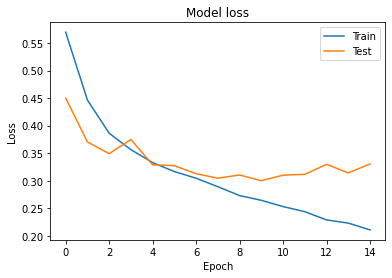

In [62]:
#Visualising the loss of the model, throughout the training process
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

### Visualising Accuracy and Loss

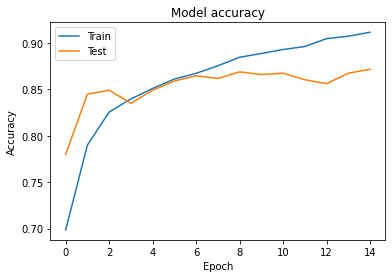

In [64]:
#Visualising the accuracy of the model, throughout the training process
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')